# __Working with Image Data__


## Steps to be followed:
1. Import the necessary libraries
2. Read and display the image
3. Display RGB channels
4. Flip augmentation
5. Perform width shifting augmentation
6. Change the brightness augmentation

### Step 1: Import the necessary libraries
- Import the required libraries

In [1]:
import tensorflow
import keras
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Step 2: Read and Display the image
- Read an image file named **leopard.jpg** using the imread function from the **io** module
- Create a subplot figure with one plot
- Set the width of the figure to **15** inches
- Display the image on the plot using the **imshow** function from the pyplot module

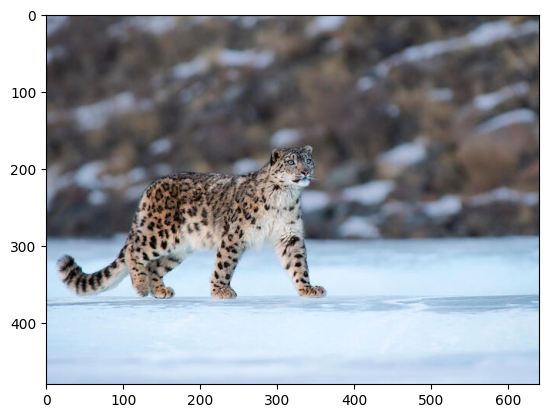

In [2]:
image = io.imread('./data/leopard.jpg')

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)
plt.show()

__Observation:__
- The output is a plot showing the original image.

### Step 3: Displaying RGB Channels
- Create a plot with one row and four subplots using **subplots(1, 4, sharey=True)**
- Set the width of the figure to 20 using **set_figwidth(20)**
- Display the original image on the first subplot using **im1.imshow(image)**
- Display the red channel of the image on the second subplot using **im2.imshow(image[:, : , 0])**
- Display the green channel of the image on the third subplot using **im3.imshow(image[:, : , 1])**
- Display the blue channel of the image on the fourth subplot using **im4.imshow(image[:, : , 2])**
- Set the title of the figure as **Original and RGB image channels** using **i.suptitle('Original and RGB image channels')**

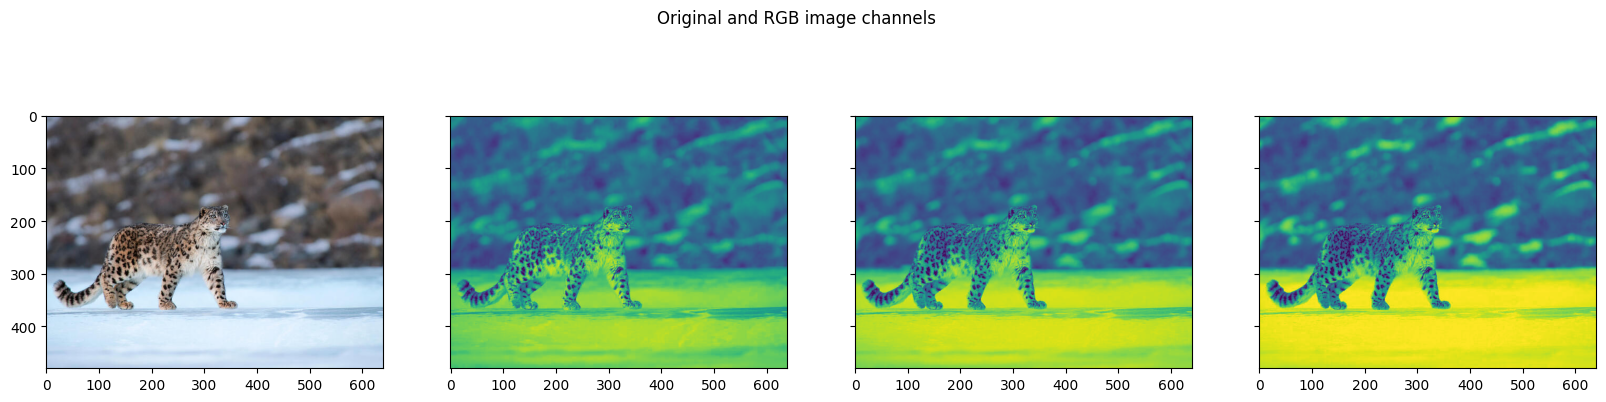

In [3]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20)

im1.imshow(image)
im2.imshow(image[:, : , 0])
im3.imshow(image[:, : , 1])
im4.imshow(image[:, : , 2])
i.suptitle('Original and RGB image channels')
plt.show()

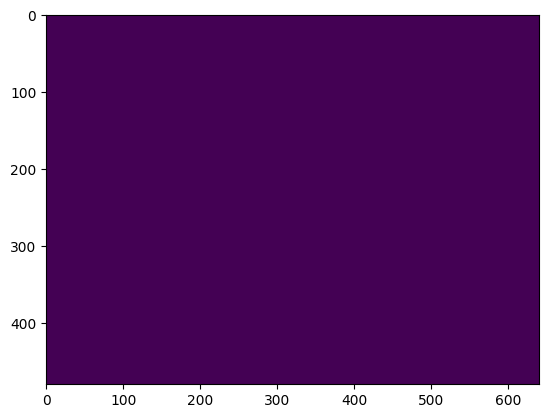

In [4]:
allBlack = np.zeros((image.shape[0],image.shape[1]))
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(allBlack)
plt.show()

In [5]:
allBlack

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

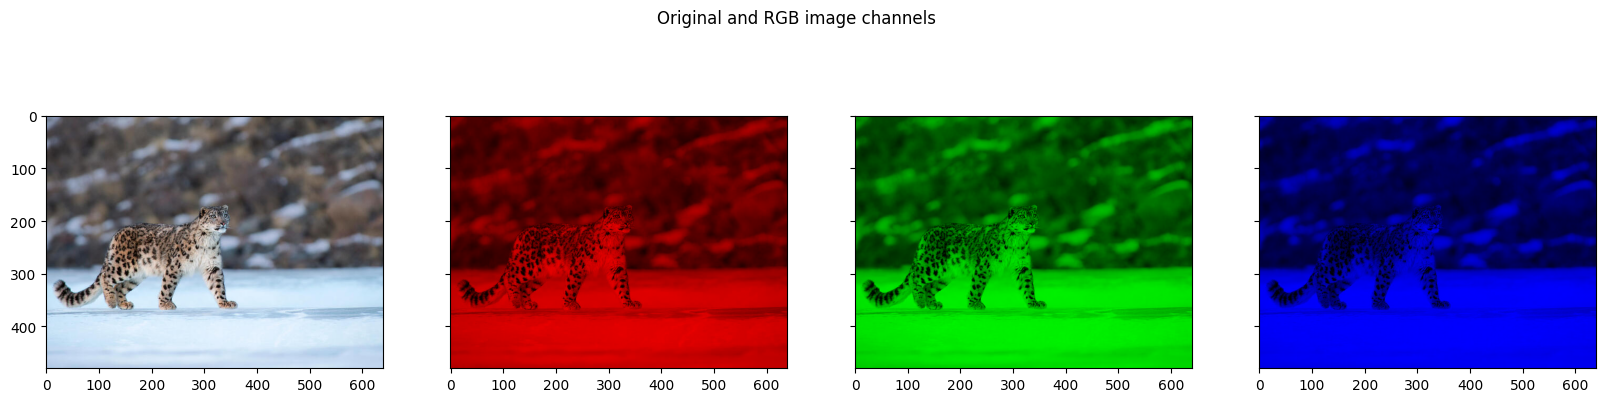

In [6]:
#imred = np.concatenate((image[:, : , 0],allBlack,allBlack), axis=0).reshape((image.shape[0],image.shape[1],-1))
imred =   np.moveaxis(np.array([list(image[:, : , 0]),list(allBlack),list(allBlack)]),0,2)/255
imgreen = np.moveaxis(np.array([list(allBlack),list(image[:, : , 1]),list(allBlack)]),0,2)/255
imblue =  np.moveaxis(np.array([list(allBlack),list(allBlack),list(image[:, : , 2])]),0,2)/255

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20)

# Create an all black channel.
allBlack = np.zeros((image.shape[0],image.shape[1]))


im1.imshow(image)
im2.imshow(imred)
im3.imshow(imgreen)
im4.imshow(imblue)
i.suptitle('Original and RGB image channels')
plt.show()

__Observation:__
- The output is a figure with four subplots showing the original image and its RGB channels.

### Step 4: Flip augmentation

Applying horizontal and vertical shifting augmentation to an image:
- The code defines an image augmentation technique called flipping.
- The **expand_dims** function is used to add an extra dimension to the image array.
- An **ImageDataGenerator** is created with **horizontal_flip=True** and **vertical_flip=True** parameters to enable flipping of the images.
- The flow method of the datagen object is called with the samples array and a batch size of **1** to generate a batch of augmented images.
- A subplot with **1** row and **3** columns is created with a figure size of **15x15.**
- A loop is executed 3 times to generate and plot the augmented images.
- Inside the loop, the next augmented **modified_image** is obtained using the next method on the **it** iterator.
- The obtained **modified_image** is converted to unsigned integers (uint8) and plotted using the __imshow__ method of the respective subplot.

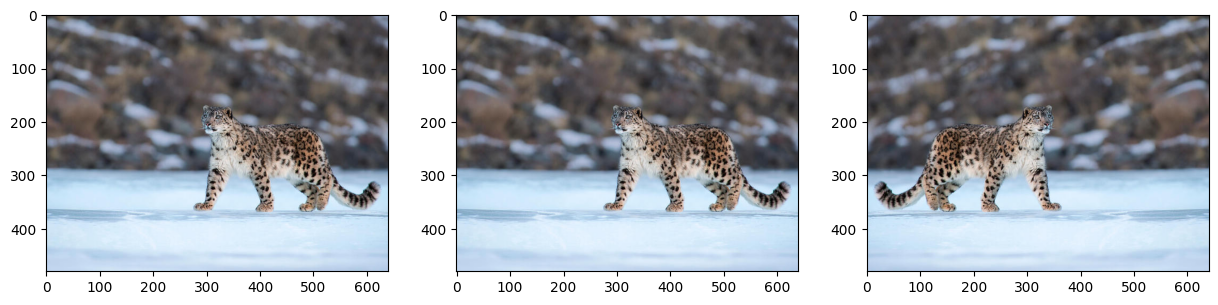

In [7]:
samples = expand_dims(image,0)
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)


__Observation:__
- The code generates and displays three flipped versions of the original image using horizontal and vertical flipping.

### Step 5: Perform width shifting augmentation
- The code prepares the image for augmentation by adding an extra dimension using **expand_dims.**
- An image data augmentation generator is created using **ImageDataGenerator** with a **width_shift_range** of **[-200, 200]**, which specifies the range of horizontal shift values.
- An iterator is created using flow on the datagen object with the samples array and a batch size of **1.**
- A subplot with **1** row and **3** columns is created with a figure size of **15x15.**
- A loop is executed 3 times to generate and plot augmented images.
- Inside the loop, the next augmented **modified_image** is obtained using the next method on the **it** iterator.
- The obtained **modified_image** is converted to unsigned integers (uint8) and plotted using the __imshow__ method of the respective subplot.

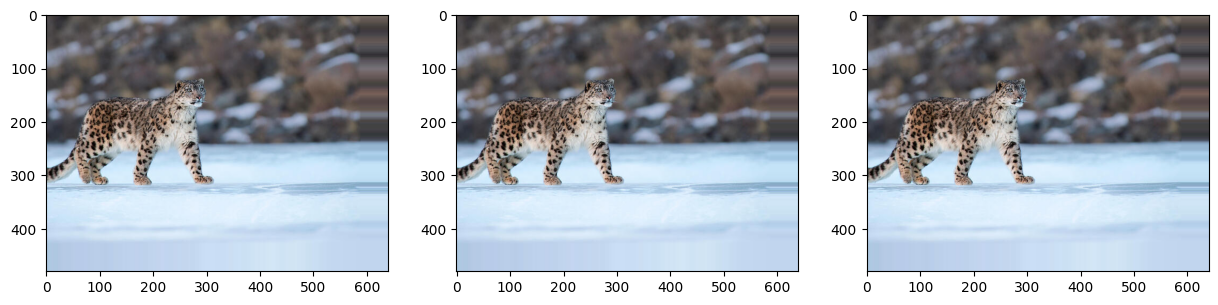

In [8]:
samples = expand_dims(image, 0)

datagen = ImageDataGenerator(width_shift_range=[-50,50],height_shift_range=[-50,50])

it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)

__Observation:__
- The code generates and displays three horizontally shifted versions of the original image within the specified range **[-200, 200]**.

### Step 6: Change the brightness augmentation
- An image data augmentation generator is created using **ImageDataGenerator** with a **brightness_range** of **[0.5, 2.0]**, which specifies the range of brightness values.
- An iterator is created using flow on the datagen object with the samples array and a batch size of **1.**
- A subplot with **1** row and **3** columns is created with a figure size of **15x15.**
- A loop is executed 3 times to generate and plot augmented images.
- Inside the loop, the next augmented **modified_image** is obtained using the next method on the it iterator.
- The obtained **modified_image** is converted to unsigned integers (uint8) and plotted using the imshow method of the respective subplot.

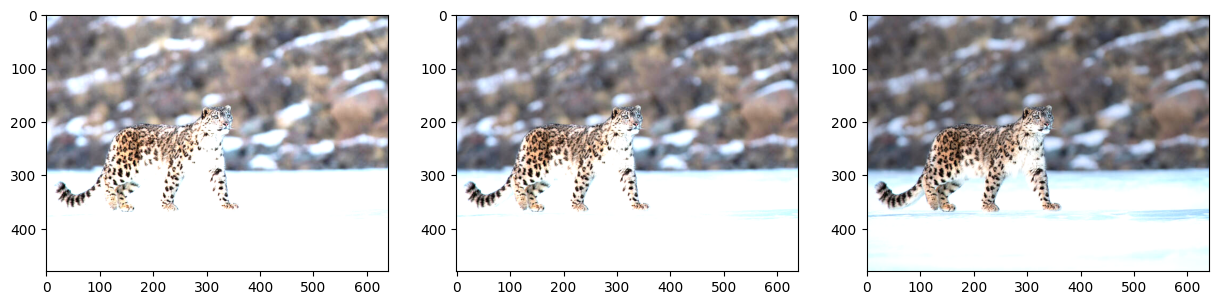

In [9]:
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)

__Observation:__
- The code generates and displays three brightness-augmented versions of the original image within the specified brightness range __[0.5, 2.0]__.

### Step 7: Perform rotation

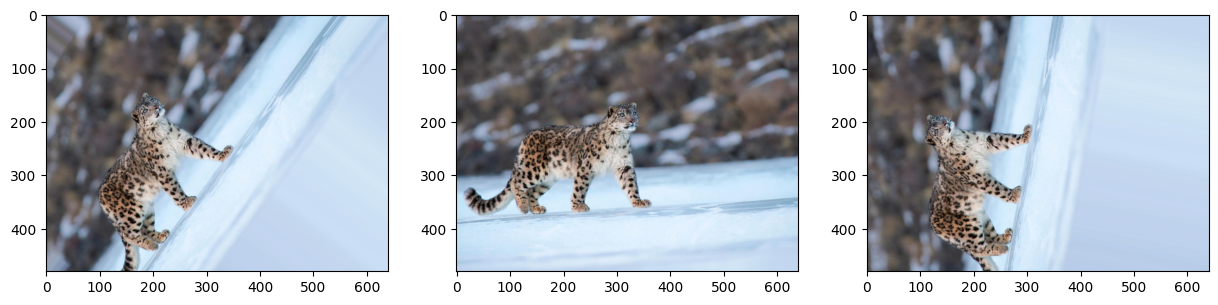

In [10]:
datagen = ImageDataGenerator(rotation_range=90)
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)

### Step 8: Zoom

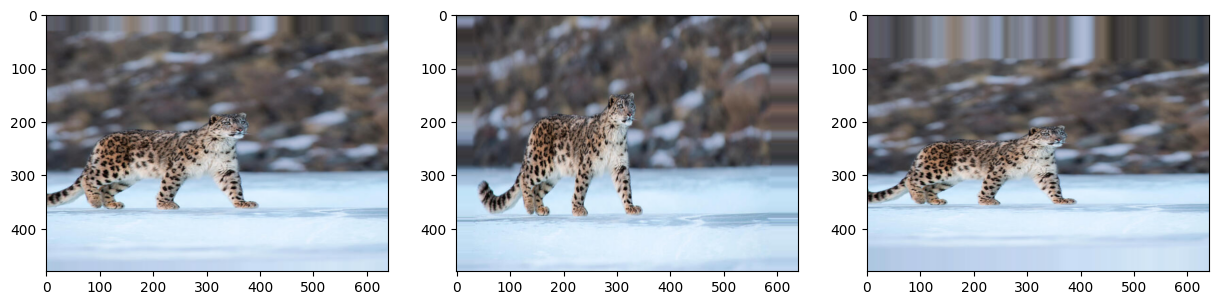

In [11]:
datagen = ImageDataGenerator(zoom_range=[.5,1.5])
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

for i in range(3):

    modified_image = next(it)[0].astype('uint8')

    im[i].imshow(modified_image)

### Step 8: all at once! (except for zoom)

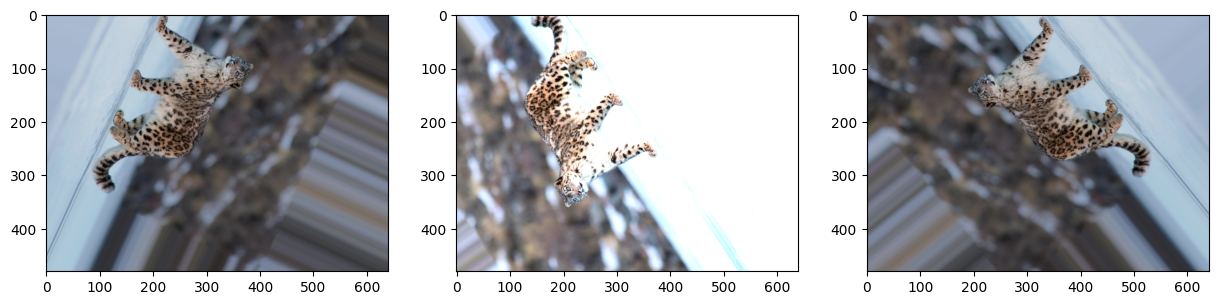

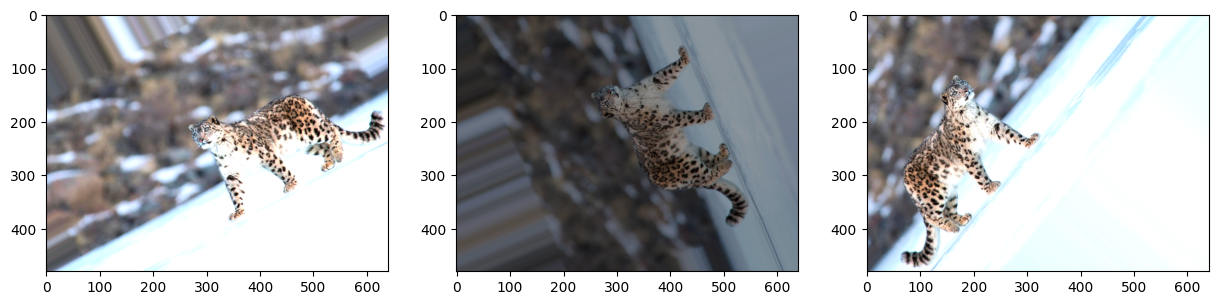

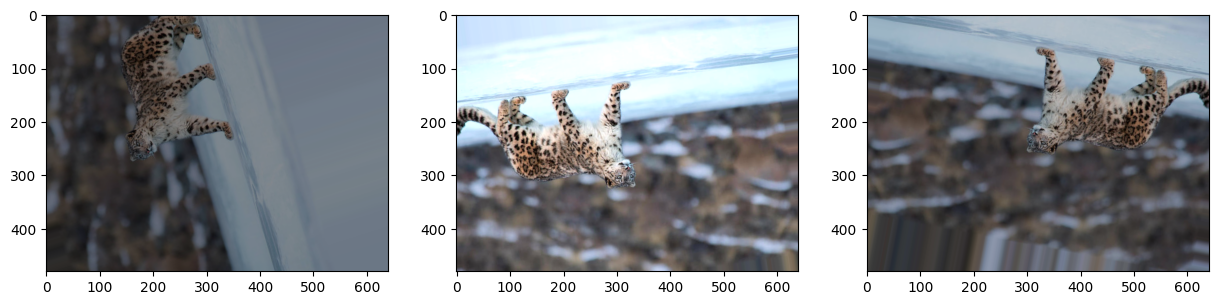

In [12]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True,width_shift_range=[-30,30],height_shift_range=[-30,30],rotation_range=90,brightness_range=[0.5,2.0])
it = datagen.flow(samples, batch_size=1)
for j in range(3):
  fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))
  for i in range(3):
    modified_image = next(it)[0].astype('uint8')
    im[i].imshow(modified_image)